In [1]:
! pip install aimodelshare --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.8/971.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.2/451.2 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━

In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Adv_ML')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [6]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()
     

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             88 non-null     object 
 1   GDP per capita                88 non-null     float64
 2   Social support                88 non-null     float64
 3   Healthy life expectancy       88 non-null     float64
 4   Freedom to make life choices  88 non-null     float64
 5   Generosity                    88 non-null     float64
 6   Perceptions of corruption     88 non-null     float64
 7   name                          88 non-null     object 
 8   region                        88 non-null     object 
 9   sub-region                    88 non-null     object 
 10  Terrorist_attacks             88 non-null     float64
dtypes: float64(7), object(4)
memory usage: 7.7+ KB


# Explore bivariate results

In [14]:
### Biraviate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.concat([y_train, X_train], axis=1, join='inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Average                       88 non-null     int64  
 1   High                          88 non-null     int64  
 2   Low                           88 non-null     int64  
 3   Very High                     88 non-null     int64  
 4   Very Low                      88 non-null     int64  
 5   Country or region             88 non-null     object 
 6   GDP per capita                88 non-null     float64
 7   Social support                88 non-null     float64
 8   Healthy life expectancy       88 non-null     float64
 9   Freedom to make life choices  88 non-null     float64
 10  Generosity                    88 non-null     float64
 11  Perceptions of corruption     88 non-null     float64
 12  name                          88 non-null     object 
 13  region 

In [15]:
df.head()

Average  High  Low  Very High  Very Low Country or region  GDP per capita  \
0        1     0    0          0         0              Peru           0.960   
1        0     1    0          0         0         Nicaragua           0.694   
2        1     0    0          0         0            Greece           1.181   
3        0     0    0          1         0             Qatar           1.684   
4        0     1    0          0         0        Uzbekistan           0.745   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           1.274                    0.854                         0.455   
1           1.325                    0.835                         0.435   
2           1.156                    0.999                         0.067   
3           1.313                    0.871                         0.555   
4           1.529                    0.756                         0.631   

   Generosity  Perceptions of corruption        name    region  \
0       0.083                      0.027        Peru  Americas   
1       0.200                      0.127   Nicaragua  Americas   
2       0.000                      0.034      Greece    Europe   
3       0.220                      0.167       Qatar      Asia   
4       0.322                      0.240  Uzbekistan      Asia   

                        sub-region  Terrorist_attacks  
0  Latin America and the Caribbean          18.000000  
1  Latin America and the Caribbean         125.611111  
2                  Southern Europe         112.000000  
3                     Western Asia          57.333333  
4                     Central Asia         125.611111

Text(0, 0.5, 'GDP per capita')

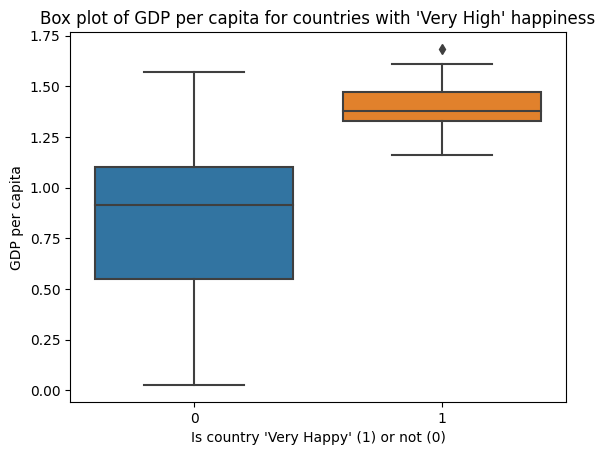

In [22]:
sns.boxplot(data=df, x="Very High", y="GDP per capita")
# add a title
plt.title("Box plot of GDP per capita for countries with 'Very High' happiness")
# add a label to the x/y-axis
plt.xlabel("Is country 'Very Happy' (1) or not (0)")
plt.ylabel("GDP per capita")

Text(0, 0.5, 'Social Support')

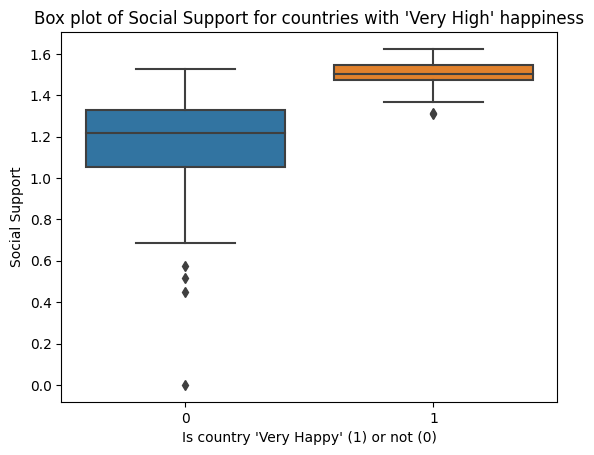

In [20]:
sns.boxplot(data=df, x="Very High", y="Social support")
# add a title
plt.title("Box plot of Social Support for countries with 'Very High' happiness")
# add a label to the x/y-axis
plt.xlabel("Is country 'Very Happy' (1) or not (0)")
plt.ylabel("Social Support")

Text(0, 0.5, 'Healthy life expectancy')

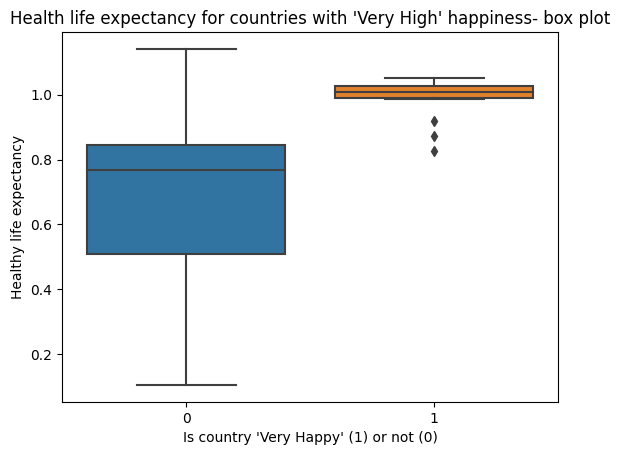

In [21]:
sns.boxplot(data=df, x="Very High", y="Healthy life expectancy")
# add a title
plt.title("Health life expectancy for countries with 'Very High' happiness- box plot")
# add a label to the x/y-axis
plt.xlabel("Is country 'Very Happy' (1) or not (0)")
plt.ylabel("Healthy life expectancy")

# preprossor and upload to leaderboard

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [24]:
#function that transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [25]:
#Save preprocessor
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"")     
from aimodelshare.aws import set_credentials
#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"
set_credentials(apiurl=apiurl)
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

Your preprocessor is now saved to 'preprocessor.zip'
Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


# Prediction Modeling
I used three models in the test
- random forest calssifier, max_depth = 3, n_estimators = 300, f-1 score = 43.72
- Gradient Boosting Classifier, n_estimators = 50, learning_rate = 1, max_depth=1, f-1 score = 46.94
- 3-layer Nerual Network, batch size=10, epoch=200, f-1 score = 43.94

In [26]:
# model 1 - random forest classifier
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(n_estimators=300, max_depth=3)
model1.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model1.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.8522727272727273

In [27]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model1, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [30]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model1.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})
     

Insert search tags to help users find your model (optional): model1
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 945

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [29]:
#model 2 - GradientBoostingClassifier

In [37]:
#Example code to fit model:
model2 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model2.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model2.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


Insert search tags to help users find your model (optional): model2
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 946

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
#model 3 - tensor flow

In [39]:
# Import relevant modules from TensorFlow
import tensorflow as tf
from tensorflow.keras import layers

# define the model architecture
model3 = tf.keras.Sequential()

# add the first convolutional layer with 16 filters and 'relu' activation
model3.add(tf.keras.layers.Conv2D(16, (4, 4), activation='relu'))

# add max pooling with a 2 by 2 filter
model3.add(tf.keras.layers.MaxPooling2D((4, 4)))

# add the second convolutional layer with 28 filters and 'relu' activation
model3.add(tf.keras.layers.Conv2D(28, (3, 3), activation='relu'))

# add max pooling with a 2 by 2 filter
model3.add(tf.keras.layers.MaxPooling2D((4, 4)))

# add the output layer with 'softmax' activation
model3.add(tf.keras.layers.Dense(5, activation='softmax'))

# compile the model using 'sgd' optimizer
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
     

In [40]:
# Import relevant modules from TensorFlow
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD


model3 = Sequential([
    Dense(32, input_dim=(26)),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(5),
    Activation('softmax'),
])

# compile the model using 'sgd' optimizer
model3.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy'])
     

In [41]:
# fitting the model
import numpy as np
tf.config.run_functions_eagerly(True)
model3.fit(preprocessor(X_train), y_train, validation_split=0.25, epochs=200, batch_size=10)

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/200
7/7 [==============================] - ETA: 0s - loss: 1.5713 - accuracy: 0.3030

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


7/7 [==============================] - 1s 92ms/step - loss: 1.5713 - accuracy: 0.3030 - val_loss: 1.6036 - val_accuracy: 0.1818
Epoch 2/200
7/7 [==============================] - 1s 100ms/step - loss: 1.5580 - accuracy: 0.3333 - val_loss: 1.5949 - val_accuracy: 0.1818
Epoch 3/200
7/7 [==============================] - 1s 100ms/step - loss: 1.5461 - accuracy: 0.3485 - val_loss: 1.5871 - val_accuracy: 0.1818
Epoch 4/200
7/7 [==============================] - 1s 103ms/step - loss: 1.5352 - accuracy: 0.3939 - val_loss: 1.5794 - val_accuracy: 0.2273
Epoch 5/200
7/7 [==============================] - 0s 68ms/step - loss: 1.5229 - accuracy: 0.4242 - val_loss: 1.5719 - val_accuracy: 0.2727
Epoch 6/200
7/7 [==============================] - 0s 46ms/step - loss: 1.5096 - accuracy: 0.4242 - val_loss: 1.5645 - val_accuracy: 0.2727
Epoch 7/200
7/7 [==============================] - 0s 43ms/step - loss: 1.4964 - accuracy: 0.4394 - val_loss: 1.5563 - val_accuracy: 0.2727
Epoch 8/200
7/7 [============

In [42]:
# Save keras model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='keras',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels=model3.predict(preprocessor(X_test))
prediction_labels=np.argmax(prediction_labels,axis=-1)
labels = {0: 'Average', 1: 'High', 2: 'Low', 3: 'Very High', 4: 'Very Low'}
prediction_labels = [labels[i] for i in prediction_labels]


# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

3/3 [==============================] - 0s 8ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Insert search tags to help users find your model (optional): model3
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 947

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

# try other models and improve on leaderboard
- model 4 - keras model, batch size = 20, epochs = 300, f-1 score = 39.34
  
  unfortunately, model 4 performs worse than former 3 models
- model 5 - grid search for random forest classifier , f-1 score = 46.94. 

  The f-1 score remains the same before and after the grid search
- model 6 - gradient boost classifier : change n_estimators from 125 to 52, learning rate from 1 to 1.115  

  f-1 score is 46.94.

In [ ]:
# model 4 - keras model

In [45]:
#experiment with deep learning models: e
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count=preprocessor(X_train).shape[1] #count features in input data

keras_model = Sequential()
keras_model.add(Dense(128, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dense(32, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 300, validation_split=0.25)  

Epoch 1/300
1/4 [======>.......................] - ETA: 0s - loss: 1.6026 - accuracy: 0.4500

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 0s 92ms/step - loss: 1.6090 - accuracy: 0.3030 - val_loss: 1.6223 - val_accuracy: 0.1364
Epoch 2/300
1/4 [======>.......................] - ETA: 0s - loss: 1.6046 - accuracy: 0.3000

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


4/4 [==============================] - 0s 78ms/step - loss: 1.6032 - accuracy: 0.2879 - val_loss: 1.6178 - val_accuracy: 0.1364
Epoch 3/300
4/4 [==============================] - 0s 63ms/step - loss: 1.5970 - accuracy: 0.2879 - val_loss: 1.6139 - val_accuracy: 0.1364
Epoch 4/300
4/4 [==============================] - 0s 70ms/step - loss: 1.5918 - accuracy: 0.3030 - val_loss: 1.6100 - val_accuracy: 0.1364
Epoch 5/300
4/4 [==============================] - 0s 72ms/step - loss: 1.5854 - accuracy: 0.2879 - val_loss: 1.6060 - val_accuracy: 0.1364
Epoch 6/300
4/4 [==============================] - 0s 85ms/step - loss: 1.5792 - accuracy: 0.2879 - val_loss: 1.6017 - val_accuracy: 0.1364
Epoch 7/300
4/4 [==============================] - 0s 75ms/step - loss: 1.5738 - accuracy: 0.2879 - val_loss: 1.5980 - val_accuracy: 0.1364
Epoch 8/300
4/4 [==============================] - 0s 79ms/step - loss: 1.5678 - accuracy: 0.2879 - val_loss: 1.5941 - val_accuracy: 0.1364
Epoch 9/300
4/4 [===============

In [46]:
# Save keras model to ONNX file 

from aimodelshare.aimsonnx import model_to_onnx

onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [47]:
# Submit keras model: 

#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

# Submit keras model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

3/3 [==============================] - 0s 7ms/step


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Insert search tags to help users find your model (optional): model4
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 948

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [ ]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
#model 5- grid search for random forest classifier

In [50]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Example code to fit model:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
    max_depth=1, random_state=0).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values 
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)


Insert search tags to help users find your model (optional): model5
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 950

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [51]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [ ]:
#model 6

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

model6 = GradientBoostingClassifier(n_estimators=52, learning_rate=1.115, max_depth=1)

#use meta model methods to fit score and predict model:
model6.fit(preprocessor(X_train), y_train_labels)

GradientBoostingClassifier(learning_rate=1.115, max_depth=1, n_estimators=52)

In [54]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model6, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#-- Generate predicted values (a list of predicted labels "real" or "fake")
prediction_labels = model6.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                           custom_metadata={"team":"5"})

Insert search tags to help users find your model (optional): model6
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 951

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [55]:
# Get leaderboard

data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)